In [2]:
import sys
import os
os.environ['PROJ_DATA'] = "/pscratch/sd/p/plutzner/proj_data"
import xarray as xr
import torch
import torchinfo
import random
import numpy as np
import importlib as imp
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cartopy.crs as ccrs
import json
import pickle
import gzip
#import matplotlib.colors as mcolorsxx

%load_ext autoreload
%autoreload 2
import utils
import utils.filemethods as filemethods
import databuilder.data_loader as data_loader
from databuilder.data_generator import multi_input_data_organizer
from databuilder.data_generator import ClimateData
import databuilder.data_generator as data_generator
# import databuilder.nino_indices as nino_indices # CAUSES CELL TO HANG

print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")
print(f"xarray version = {xr.__version__}")
print(f"pytorch version = {torch.__version__}")

# https://github.com/victoresque/pytorch-template/tree/master

python version = 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
numpy version = 1.26.4
xarray version = 2024.2.0
pytorch version = 2.1.2.post2


In [5]:
train_ds = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens1/input_vars.v2.LR.historical_0101.eam.h1.1850-1900.nc")

In [13]:
prect = train_ds["PRECT"]
prect.values * 10e3 * 86400

array([[[ 0.75371404,  0.75525987,  0.7567507 , ...,  0.74875468,
          0.75046018,  0.75211375],
        [ 0.51657055,  0.52325923,  0.52993227, ...,  0.49647284,
          0.50317119,  0.50987252],
        [ 0.46933657,  0.48346092,  0.49777904, ...,  0.4280769 ,
          0.44164969,  0.45540118],
        ...,
        [ 0.14095042,  0.13381758,  0.12669361, ...,  0.16242933,
          0.15525359,  0.14809486],
        [ 0.12907959,  0.12488175,  0.12067625, ...,  0.14160679,
          0.13744415,  0.13326774],
        [ 0.0967058 ,  0.09516778,  0.09363363, ...,  0.10132856,
          0.09978765,  0.09824624]],

       [[ 0.26870513,  0.27055789,  0.27238834, ...,  0.26302907,
          0.26493899,  0.26683161],
        [ 0.18483641,  0.18951262,  0.19417817, ...,  0.170772  ,
          0.17546324,  0.18015233],
        [ 0.17347516,  0.18159267,  0.18979268, ...,  0.14954636,
          0.15745916,  0.16543303],
        ...,
        [ 0.13495707,  0.12724641,  0.11952692, ...,  

In [7]:
#examp = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens1/v2.LR.historical_0101.eam.h0.1850-01.nc")
examp = xr.open_dataset("/pscratch/sd/q/qinyi/E3SMv2_init/v2.LR.historical_0101/archive/atm/hist/v2.LR.historical_0101.eam.h0.1850-01.nc")

In [8]:
examp.info

<bound method Dataset.info of <xarray.Dataset> Size: 445MB
Dimensions:              (ncol: 21600, lev: 72, ilev: 73, cosp_prs: 7, nbnd: 2,
                          cosp_tau: 7, cosp_scol: 10, cosp_ht: 40, cosp_sr: 15,
                          cosp_sza: 5, cosp_htmisr: 16, cosp_tau_modis: 7,
                          cosp_reffice: 6, cosp_reffliq: 6, time: 1)
Coordinates: (12/13)
  * lev                  (lev) float64 576B 0.1238 0.1828 0.2699 ... 993.8 998.5
  * ilev                 (ilev) float64 584B 0.1 0.1477 0.218 ... 997.0 1e+03
  * cosp_prs             (cosp_prs) float64 56B 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_tau             (cosp_tau) float64 56B 0.15 0.8 2.45 ... 41.5 100.0
  * cosp_scol            (cosp_scol) int32 40B 1 2 3 4 5 6 7 8 9 10
  * cosp_ht              (cosp_ht) float64 320B 1.896e+04 1.848e+04 ... 240.0
    ...                   ...
  * cosp_sza             (cosp_sza) float64 40B 0.0 20.0 40.0 60.0 80.0
  * cosp_htmisr          (cosp_htmisr) float64 128B

Total area under the histogram: 0.9999999999999998


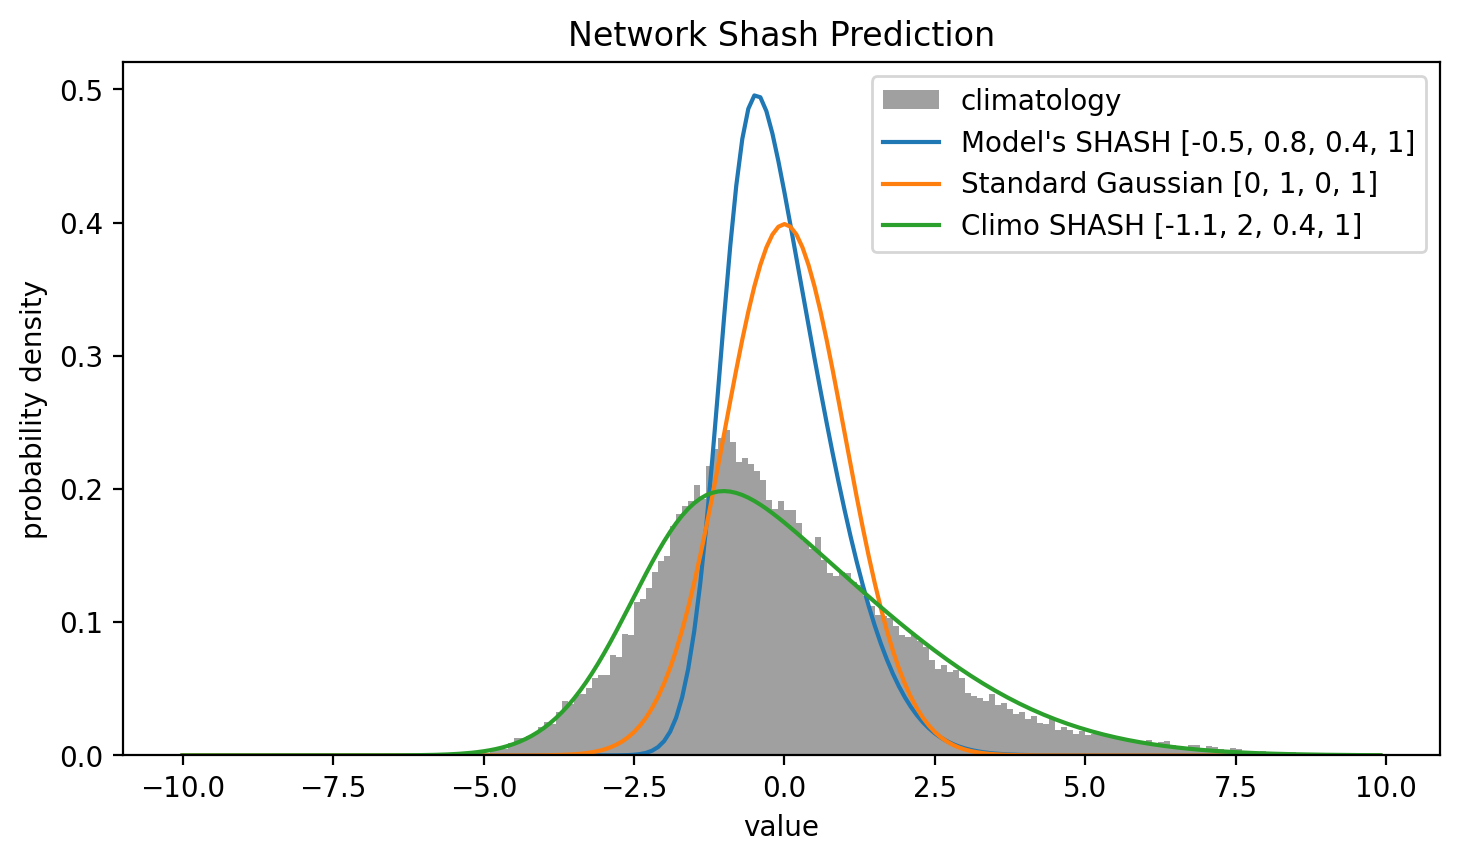

In [44]:
import shash.shash_torch
from shash.shash_torch import Shash
imp.reload(shash.shash_torch)

output = np.array([[-1.8269005 ,  1.552628  ,   0.39592332,   1. ], 
                  [4 , 8.10926   ,  0.10827847,  1.], 
                  [-0.5 , 0.8 , .4,  1. ], 
                  [0,     1,     0,   1], 
                  [-1.1,  2,    0.4,  1]])

climate_data = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_train.pkl'

with gzip.open(climate_data, "rb") as obj1:
    data = pickle.load(obj1)
climatology = data["y"]

# bins_inc = 0.025
# bins = np.arange(-10, 10, bins_inc)

plt.figure(figsize=(8.5, 4.5), dpi=200)

x = np.arange(-10, 10, 0.1)
dist = Shash(output)
p = dist.prob(x).numpy()

counts, bin_edges, __ = plt.hist(
    climatology, x, density=True, color="gray", alpha=0.75, label="climatology")

bin_widths = np.diff(bin_edges)
area = np.sum(counts * bin_widths)
print(f'Total area under the histogram: {area}')

plt.plot(x, p[:, 2], label = "Model's SHASH [-0.5, 0.8, 0.4, 1]")
plt.plot(x, p[:, 3], label = "Standard Gaussian [0, 1, 0, 1]")
plt.plot(x, p[:, 4], label = "Climo SHASH [-1.1, 2, 0.4, 1]")
plt.xlabel("value")
plt.ylabel("probability density")
plt.title("Network Shash Prediction")
plt.legend()
plt.show()

In [ ]:
from shash.shash_torch import Shash
# params = np.zeros((2,4))
# # mu = 0; sigma=1., gamma=0, tau=1
# params[:,1] = 1.
# params[:,-1] = .003
# s = Shash(params)
s = Shash(output)

x = np.arange(-20,100,.1)
y = s.prob(x)
np.shape(y)

for i in (1000, 300, 10, 40):
    plt.plot(x, y[:,i])

In [2]:
test_ds = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens3/input_vars.v2.LR.historical_0201.eam.h1.1850-2014.nc")


In [34]:
PRECT_m_s = test_ds.PRECT[30000:40000]

mm/day <xarray.DataArray 'PRECT' (time: 10000, lat: 180, lon: 360)> Size: 3GB
array([[[3.9205301e-01, 3.9207911e-01, 3.9211363e-01, ...,
         3.9202607e-01, 3.9202654e-01, 3.9203542e-01],
        [4.5706582e-01, 4.5807940e-01, 4.5908427e-01, ...,
         4.5399231e-01, 4.5502031e-01, 4.5604545e-01],
        [4.3636036e-01, 4.3956658e-01, 4.4286770e-01, ...,
         4.2731255e-01, 4.3023324e-01, 4.3324926e-01],
        ...,
        [4.9745071e-01, 5.1310223e-01, 5.2896857e-01, ...,
         4.5147157e-01, 4.6666664e-01, 4.8198265e-01],
        [3.2904327e-01, 3.3572435e-01, 3.4225571e-01, ...,
         3.0821007e-01, 3.1527522e-01, 3.2222325e-01],
        [1.6787815e-01, 1.6898030e-01, 1.7005144e-01, ...,
         1.6439775e-01, 1.6558550e-01, 1.6674611e-01]],

       [[6.5092035e-02, 6.4610936e-02, 6.4133942e-02, ...,
         6.6555686e-02, 6.6064857e-02, 6.5576822e-02],
        [6.4371131e-02, 6.3598573e-02, 6.2833756e-02, ...,
         6.6740930e-02, 6.5941751e-02, 6.5152004e-

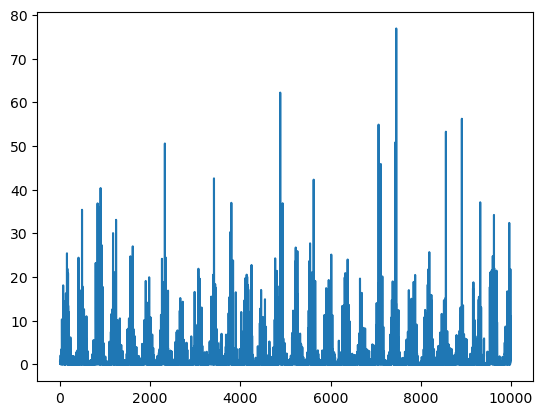

In [49]:
# print(f"m/s {PRECT_m_s}")
PRECT_mm_d = PRECT_m_s * (10**3) * 3600 * 24
print(f"mm/day {PRECT_mm_d}")

seattle_mm_d = PRECT_mm_d.sel(lat = 49, lon = 123, method = 'nearest')

plt.figure()
plt.plot(seattle_mm_d)

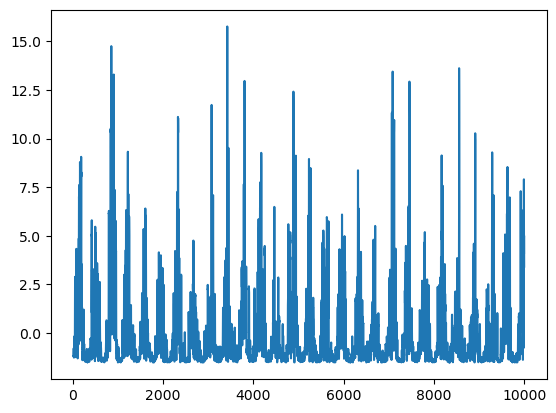

In [50]:
seattle_mm_d_anom = seattle_mm_d - np.mean(seattle_mm_d)
seattle_mm_d_rolling = seattle_mm_d_anom.rolling(time = 7).mean()
plt.figure()
plt.plot(seattle_mm_d_rolling)

In [11]:
3600*24
10**3 * 3600 * 24

86400000

In [30]:
savename = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/exp006_d_test_SeattleRegional_PRECT_1850-2014.pkl"

with gzip.open(savename, "rb") as obj1:
    val_dat = pickle.load(obj1)
obj1.close()



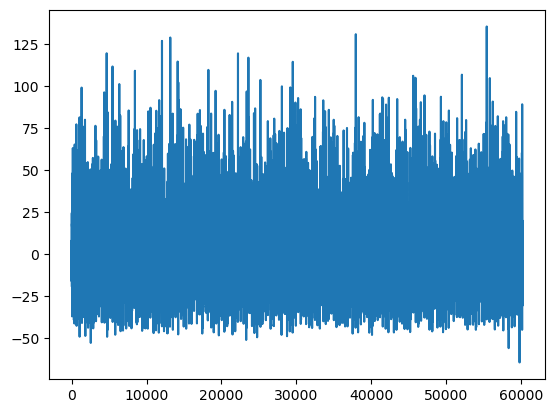

In [31]:
plt.figure()
plt.plot(val_dat["y"])

In [66]:
config = utils.get_config("exp006")
seed = config["seed_list"][0]

imp.reload(utils)
imp.reload(filemethods)
imp.reload(data_generator)

data = ClimateData(
    config["databuilder"], 
    expname = config["expname"],
    seed=seed,
    data_dir = config["data_dir"], 
    figure_dir=config["figure_dir"],
    target_only = True, 
    fetch=False,
    verbose=False
)

In [67]:
d_train, d_val, d_test = data.fetch_data()

Opening .nc files
Opening .nc files
Opening .nc files
Processing training
Processing target output
before incremental adjustment
Target region is a box region. Calculating regional average
removing seasonal cycle
rolling average
lag
completed processing target
Processing validation
Processing target output
before incremental adjustment
Target region is a box region. Calculating regional average
removing seasonal cycle
rolling average
lag
completed processing target
Processing testing
Processing target output
before incremental adjustment
Target region is a box region. Calculating regional average
removing seasonal cycle
rolling average
lag
completed processing target


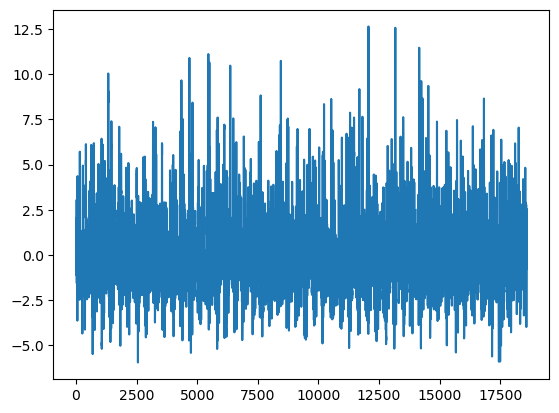

In [68]:
d_train["y"]
plt.figure()
plt.plot(d_test["y"])

In [3]:
mjo_filename = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/MJOarray.leadnans.1850-2014.pkl"

with gzip.open(mjo_filename, "rb") as obj1:
    MJOarray = pickle.load(obj1)
obj1.close()


In [11]:
MJOarray[120:145, 3, 2]

array([-0.11770853,  0.27926254,  0.1927685 , -0.03238838, -0.29996631,
       -0.3321645 , -0.28373682, -0.15200832, -0.03254344,  0.03816704,
        0.09183547,  0.10217868,  0.08118238,  0.21265218,  0.56105149,
        0.80536103,  0.90774947,  0.88396013,  1.0425688 ,  1.05158186,
        0.79214388,  0.6241079 ,  0.25383815,  0.02444118, -0.2774643 ])

In [3]:
s_dict_savename1 = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_train.pkl'
# with gzip.open(s_dict_savename1, "wb") as fp:
#     pickle.dump(s_dict_train, fp)

s_dict_savename2 = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_val.pkl'
# with gzip.open(s_dict_savename2, "wb") as fp:
#     pickle.dump(s_dict_val, fp)

s_dict_savename3 = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_test.pkl'
# with gzip.open(s_dict_savename3, "wb") as fp:
#     pickle.dump(s_dict_test, fp)

with gzip.open(s_dict_savename1, "rb") as obj1:
    train_dat = pickle.load(obj1)
obj1.close()

with gzip.open(s_dict_savename2, "rb") as obj2:
    val_dat = pickle.load(obj2)
obj2.close()

with gzip.open(s_dict_savename3, "rb") as obj3:
    test_dat = pickle.load(obj3)
obj3.close()

In [6]:
train_dat["x"].shape

(60211, 3)